This tutorial will demonstrate how to make a report for a planet candidate in TESS data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Provide some information on the star. In this example, we'll look at TIC-25375553, the host star of confirmed planet TOI-143.01 (WASP-111b).

In [2]:
star = {}
star['id'] = 25375553
star['raDegrees'] = 328.76768
star['decDegrees'] = -22.61258
star['Tmag'] = 9.77
star['rad'] = 1.95
star['mass'] = 1.34
star['teff'] = 6510

Get the lightcurve for this star from MAST. (TODO: provide utility to query QLP lightcurve from MAST once those are available. For now, load the lightcurve saved in .txt file)

In [3]:
from utils import get_lightcurve

star['time'], star['raw'], star['flux'], star['flux1'], star['flux2'], star['flux3'], star['quality'] = get_lightcurve(star['id'])

Provide some information on the planets around this star. There's only one planet in this example, but for multi-planet systems you should list all planets.

In [4]:
planet0 = {}
planet0['period'] = 2.311156214848037
planet0['epoch'] = 1327.8925145920764
planet0['durationHours'] = 0.14716113025461533*24

Before we plot the full report, get difference image data for the star for a specific sector/camera. Here we'll look at sector 1, for which the target was observed in camera 1.

In [5]:
import tessDiffImage as td

star['sector'] = 1
star['camera'] = 1
star['qualityFiles'] = None
star['qualityFlags'] = [[1, star['quality']]]
star['planetData'] = [planet0]

# td.make_ffi_difference_image(star, thisPlanet=0)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


The image data was saved in the newly created tic25375553 folder. Load it back in so we can include it in report.

In [6]:
import pickle

fname = 'tic25375553/imageData_planet0_sector1_camera1.pickle'
with open(fname, 'rb') as f:
    imageData = pickle.load(f)

Plot the pages of the report:

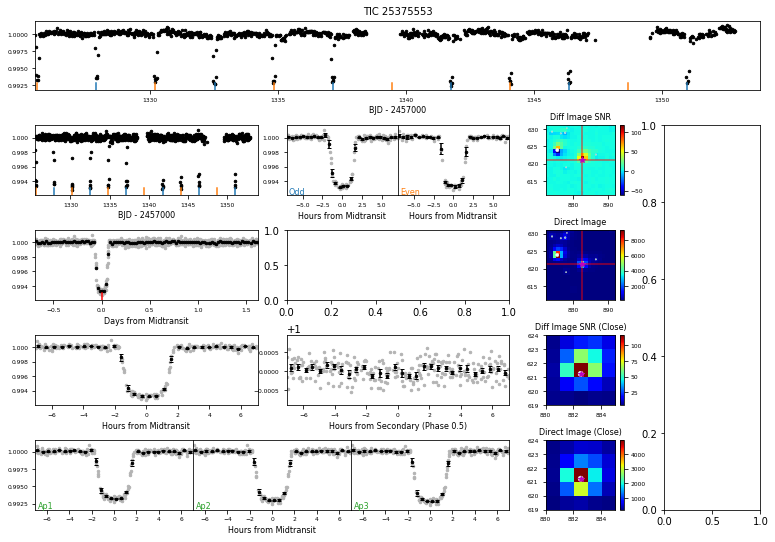

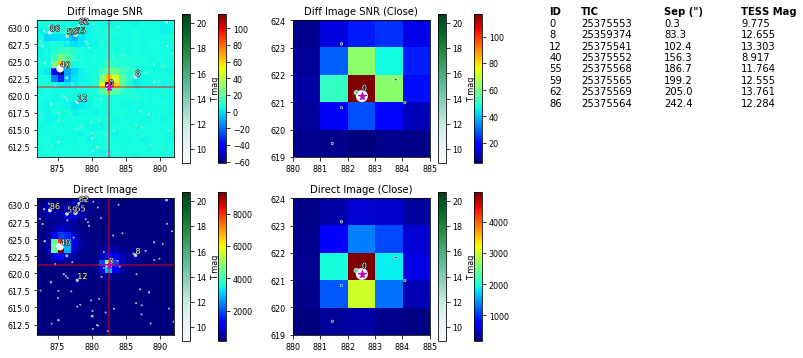

In [7]:
from plots import plot_page1, plot_page2

plot_page1(star, planet0, imageData)
plot_page2(star, imageData)